# Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

### Advantages and Disadvantages:
An advantage of random forest is that it can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.

Random Forest is also considered as a very handy and easy to use algorithm, because it’s default hyperparameters often produce a good prediction result. The number of hyperparameters is also not that high and they are straightforward to understand.

One of the big problems in machine learning is overfitting, but most of the time this won’t happen that easy to a random forest classifier. That’s because if there are enough trees in the forest, the classifier won’t overfit the model.

The main limitation of Random Forest is that a large number of trees can make the algorithm to slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. A more accurate prediction requires more trees, which results in a slower model. In most real-world applications the random forest algorithm is fast enough, but there can certainly be situations where run-time performance is important and other approaches would be preferred.

And of course Random Forest is a predictive modeling tool and not a descriptive tool. That means, if you are looking for a description of the relationships in your data, other approaches would be preferred.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/Akshat/Desktop/Machine Learning Tutorials/adultdata.txt',header=None)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex',
             'capital_gain','capital_loss','hours_per_week','country','salary']

In [4]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
print(data['salary'].unique())
print(data['sex'].unique())

[0 1]
[' Male' ' Female']


In [11]:
data.isnull().values.any()

False

In [17]:
pd.isnull(data).sum()>0

age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
country           False
salary            False
dtype: bool

### No null values in our data

In [5]:
data['salary']=np.where(data['salary']==' <=50K',0,1)
data['sex']=np.where(data['sex']==' Male',0,1)

In [24]:
data.salary.unique()

array([0, 1], dtype=int64)

In [27]:
data.sex.unique()

array([0, 1], dtype=int64)

In [28]:
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0


In [6]:
new_data=pd.get_dummies(data)
new_data.head(2)

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,salary,workclass_ ?,workclass_ Federal-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data_column=new_data[new_data.columns.difference(['salary'])]
data_output=new_data['salary']

In [35]:
rf=RandomForestClassifier()
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
k=np.arange(1,49)
rf_roc_auc=[]
accuracy=[]
for i in k:
    rf = RandomForestClassifier()
    rfe = RFE(rf, i)
    rfe = rfe.fit(data_column, data_output)
    b=data_column.columns
    a=rfe.support_
    c=pd.DataFrame(a,index=b)
    c=c[c[0]==True]
    X=data_column[c.index]
    Y=data_output
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=25)
    result=rf.fit(X_train, Y_train)
    pred=result.predict(X_test)
    rf_roc_auc.append(roc_auc_score(Y_test, pred))
    accuracy.append(metrics.accuracy_score(pred,Y_test))

In [36]:
ab=pd.DataFrame(k)
auc=pd.DataFrame(rf_roc_auc)
m=pd.merge(ab,auc,left_index=True,right_index=True)
acc=pd.DataFrame(accuracy)
final=pd.merge(m,acc,left_index=True,right_index=True)

In [38]:
final.columns=['num_features','auc','accuracy']

In [39]:
final.head(2)

,num_features,auc,accuracy
0,1,0.546438,0.677859
1,2,0.619368,0.731600


In [76]:
final[final['num_features']==20]

,num_features,auc,accuracy
19,20,0.751241,0.846555


In [40]:
final.sort_values(by=['accuracy','auc'],ascending=False).head()

,num_features,auc,accuracy
30,31,0.763595,0.855359
36,37,0.760662,0.854540
38,39,0.762393,0.854438
17,18,0.766221,0.854335
43,44,0.765323,0.854335


## We are going ahead with 18 features since it's auc and accuracy are very close to the highest number and 13 less features

In [12]:
 rf = RandomForestClassifier()
rfe = RFE(rf, 18)
rfe = rfe.fit(data_column, data_output)
b=data_column.columns
a=rfe.support_
c=pd.DataFrame(a,index=b)
c=c[c[0]==True]
X=data_column[c.index]
Y=data_output
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state=25)
result=rf.fit(X_train, Y_train)
pred=result.predict(X_test)
f_rf_roc_auc=(roc_auc_score(Y_test, pred))
f_accu=(metrics.accuracy_score(pred,Y_test))

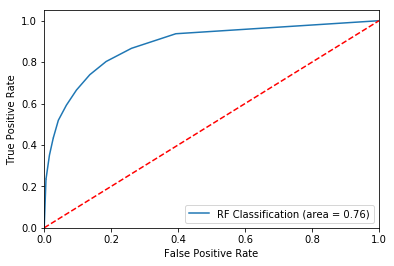

In [13]:
#logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classification (area = %0.2f)' % f_rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [79]:
# 18
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90      7463
          1       0.72      0.58      0.64      2306

avg / total       0.84      0.85      0.84      9769



In [45]:
# 31 features
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91      7463
          1       0.74      0.59      0.66      2306

avg / total       0.85      0.85      0.85      9769



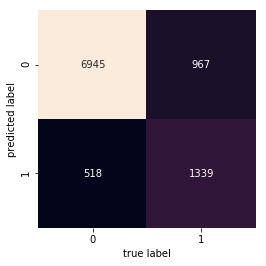

In [80]:
# 18
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

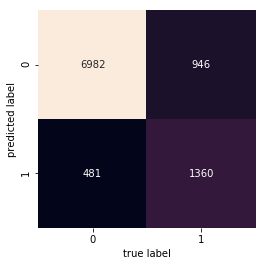

In [75]:
# 31
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
result.feature_importances_

array([ 0.14820684,  0.11048464,  0.03737134,  0.00932185,  0.0120327 ,
        0.00747689,  0.00652599,  0.08305604,  0.1677186 ,  0.08326535,
        0.08386114,  0.0273452 ,  0.00686625,  0.00872197,  0.02154507,
        0.00713243,  0.01681543,  0.00894474,  0.00527467,  0.00545199,
        0.00491134,  0.00796873,  0.06040615,  0.00958284,  0.01153415,
        0.0074738 ,  0.00552085,  0.00708986,  0.01270134,  0.00609186,
        0.00929994])

In [14]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(result.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [15]:
importances.head()

,importance
feature,
fnlwgt,0.208
age,0.159
marital_status_ Married-civ-spouse,0.124
capital_gain,0.115
education_num,0.092


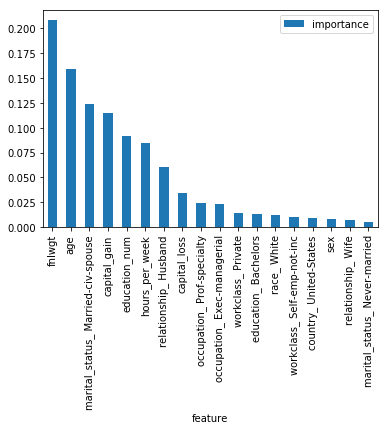

In [16]:
importances.plot.bar()

## Fitting the model on the complete data to understand feature importance

In [83]:
full=rf.fit(data_column,data_output)

In [64]:
data_column.columns

Index(['age', 'capital_gain', 'capital_loss', 'country_ ?',
       'country_ Cambodia', 'country_ Canada', 'country_ China',
       'country_ Columbia', 'country_ Cuba', 'country_ Dominican-Republic',
       ...
       'sex', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay'],
      dtype='object', length=107)

In [84]:
a=pd.DataFrame(full.feature_importances_)
a=a.set_index(data_column.columns)
a.head()
a.sort_values(by=[0],ascending=False).head(18)

,0
fnlwgt,0.161528
age,0.147875
capital_gain,0.110650
marital_status_ Married-civ-spouse,0.092756
hours_per_week,0.084906
education_num,0.062328
relationship_ Husband,0.052383
capital_loss,0.029882
occupation_ Prof-specialty,0.015564
occupation_ Exec-managerial,0.013444


## above columns are relevant in deciding whether a person will earn more than 50k/year or not

In [53]:
from treeinterpreter import treeinterpreter as ti
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
prediction, bias, contributions = ti.predict(rf, X_test)

In [58]:
prediction, bias, contributions = ti.predict(rf, X_test)
print ("Prediction", prediction)
print ("Bias (trainset prior)", bias)
print ("Feature contributions:")
for c, feature in zip(contributions[0], 
                             X_train.columns):
    print (feature, c)

Prediction [[ 0.7  0.3]
 [ 1.   0. ]
 [ 1.   0. ]
 ..., 
 [ 0.3  0.7]
 [ 1.   0. ]
 [ 0.   1. ]]
Bias (trainset prior) [[ 0.75826606  0.24173394]
 [ 0.75826606  0.24173394]
 [ 0.75826606  0.24173394]
 ..., 
 [ 0.75826606  0.24173394]
 [ 0.75826606  0.24173394]
 [ 0.75826606  0.24173394]]
Feature contributions:
age [-0.03216423  0.03216423]
capital_gain [ 0.02348313 -0.02348313]
capital_loss [ 0.01138363 -0.01138363]
country_ United-States [-0.01268499  0.01268499]
education_ Bachelors [ 0.01515337 -0.01515337]
education_ HS-grad [ 0.01041065 -0.01041065]
education_ Some-college [ 0.00702132 -0.00702132]
education_num [ 0.04858884 -0.04858884]
fnlwgt [ 0.01988986 -0.01988986]
hours_per_week [-0.02303104  0.02303104]
marital_status_ Married-civ-spouse [-0.09353747  0.09353747]
marital_status_ Never-married [-0.0177817  0.0177817]
occupation_ Adm-clerical [ 0.00164995 -0.00164995]
occupation_ Craft-repair [ 0.01552169 -0.01552169]
occupation_ Exec-managerial [ 0.02514581 -0.02514581]
occu

# Testing our model on our test data

In [89]:
test=pd.read_csv('C:/Users/Akshat/Desktop/Machine Learning Tutorials/adulttest.txt',header=None)
test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [90]:
test.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex',
             'capital_gain','capital_loss','hours_per_week','country','salary']

In [91]:
test['sex']=np.where(test['sex']==' Male',0,1)

In [92]:
test.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,>50K.


In [93]:
new_test=pd.get_dummies(test)

In [97]:
new_test.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,salary_ <=50K.,salary_ >50K.
0,25,226802,7,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,0,50,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,0,40,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,0,7688,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,1,0,0,30,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [116]:
new_test_X=new_test[X.columns] # taking only those columns on which we trained our data
new_test_Y=test['salary']

In [ ]:
(new_test_Y)=pd.DataFrame(new_test_Y)
new_test_Y.head()

In [94]:
new_test_Y['salary']=np.where(new_test_Y['salary']==' <=50K.',0,1)

(32561, 18)

In [ ]:
new_test_Y['salary'].unique()

In [95]:
model=rf.fit(X,Y)

In [99]:
pred=model.predict(new_test_X)

In [101]:
final_pred=pd.DataFrame(pred)

In [122]:
metrics.accuracy_score(new_test_Y,final_pred)


0.85074626865671643

## The accuracy results on our test results are 85.1% which is very good 

In [124]:
auc_score=roc_auc_score(new_test_Y,final_pred)

## The AUC score is also pretty high

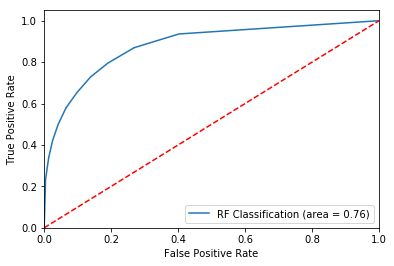

In [125]:
#logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(new_test_Y, rf.predict_proba(new_test_X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF Classification (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## The confusion matrix on our test data

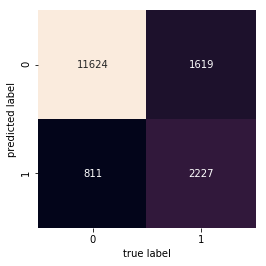

In [126]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(new_test_Y,final_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Classification Report

In [127]:
from sklearn.metrics import classification_report
print(classification_report(new_test_Y,final_pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91     12435
          1       0.73      0.58      0.65      3846

avg / total       0.84      0.85      0.84     16281

